## Feature Selection Advanced House Price Prediction

The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead

#### Dataset to downloaded from the below link
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

# Lasso technique

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
dataset=pd.read_csv('X_train.csv')

In [3]:
dataset.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [4]:
## Capture the dependent feature
y_train=dataset[['SalePrice']]




In [5]:
## drop dependent feature from dataset
X_train=dataset.drop(['Id','SalePrice'],axis=1)

In [6]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)


SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [7]:
feature_sel_model.get_support()
# here true and false is columns , true represent feature highely correlated with the o/p feature , false is voice versa of true

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [9]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]# here assign column name with true and false

# let's print some stats
print('total features: {}'.format((X_train.shape[1]))) # its show total no of features in dataset
print('selected features: {}'.format(len(selected_feat))) # its show how much feature selected , and how much columns is true
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 82
selected features: 21


NameError: name 'sel_estimator_' is not defined

In [10]:
selected_feat # list of all columns

Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'YearRemodAdd',
       'RoofStyle', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'SaleCondition'],
      dtype='object')

In [11]:
X_train=X_train[selected_feat] # here select only those feature

In [12]:
X_train.head() # and print

,MSSubClass,MSZoning,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
0,0.235294,0.75,0.636364,0.666667,0.098361,0.0,0.75,0.25,1.00,1.0,0.356155,0.577712,0.333333,0.666667,0.000000,0.2,0.8,0.666667,0.50,1.0,0.75
1,0.000000,0.75,0.500000,0.555556,0.524590,0.0,0.75,1.00,1.00,1.0,0.503056,0.470245,0.000000,0.333333,0.333333,0.6,0.8,0.666667,0.50,1.0,0.75
2,0.235294,0.75,0.636364,0.666667,0.114754,0.0,0.75,0.50,1.00,1.0,0.383441,0.593095,0.333333,0.666667,0.333333,0.6,0.8,0.666667,0.50,1.0,0.75
3,0.294118,0.75,0.727273,0.666667,0.606557,0.0,0.50,0.25,0.75,1.0,0.399941,0.579157,0.333333,0.666667,0.333333,0.8,0.4,0.333333,0.75,1.0,0.00
4,0.235294,0.75,1.000000,0.777778,0.147541,0.0,0.75,0.75,1.00,1.0,0.466237,0.666523,0.333333,0.666667,0.333333,0.6,0.8,0.666667,0.75,1.0,0.75


In [22]:
## drop dependent feature from dataset
X=dataset.drop(['Id','SalePrice'],axis=1)
## Capture the dependent feature
Y=dataset[['SalePrice']]
Y=y_train.astype(int)




# Feature Importance technique

In [23]:
from sklearn.ensemble import ExtraTreesClassifier # we implement feature important with the help of this liberary.
import matplotlib.pyplot as plt
model = ExtraTreesClassifier() # here we intiallize the model.
model.fit(X,Y) # our features fit into this

C:\Users\Puneet Singh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Puneet Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [24]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
# here is list of score features 

[0.00812242 0.01708122 0.00787541 0.01270494 0.00052958 0.00299492
 0.00636607 0.00322019 0.00034666 0.0033635  0.00319082 0.08078554
 0.00400932 0.00039029 0.00636805 0.01261322 0.04860891 0.00511009
 0.01870597 0.0302009  0.00392498 0.00232409 0.00676418 0.01331803
 0.0152111  0.00672688 0.01444287 0.00358922 0.02180713 0.04236427
 0.00205236 0.00647708 0.0169858  0.00979068 0.00209026 0.00278594
 0.0062844  0.01318796 0.00011647 0.02512023 0.00277364 0.00141733
 0.01863273 0.00770169 0.00104929 0.03167464 0.00443002 0.00363984
 0.07321516 0.01709817 0.00837401 0.0012202  0.00921648 0.02211554
 0.0044254  0.02670633 0.02376315 0.02731552 0.01315767 0.06364698
 0.02794449 0.03174349 0.00169134 0.01127112 0.00188412 0.00873596
 0.0101824  0.00264838 0.0005491  0.00825222 0.00140792 0.00150618
 0.01027764 0.00113002 0.0014083  0.00671669 0.00592928 0.00322041
 0.00607292 0.00424691 0.00085587 0.00279946]


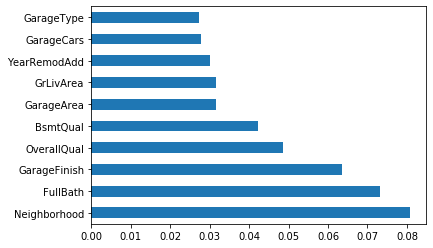

In [37]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
# here visualize top best score features
# now you also be see Ram is most important feature

In [39]:
# its for compare  Lassso with Feature model.how many feature are same selected by these two models.
'MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'YearRemodAdd',
       'RoofStyle', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'SaleCondition']

IndentationError: unexpected indent (<ipython-input-39-1ba551ba4581>, line 3)

# Univariate technique

In [29]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest # its for select my kth highley coorelated features.
from sklearn.feature_selection import chi2 # internally i ll use chi-score test.
data = pd.read_csv("train_.csv")  #independent columns
    #target column i.e price range


In [30]:
## drop dependent feature from dataset
X=dataset.drop(['Id','SalePrice'],axis=1)
## Capture the dependent feature
Y=dataset[['SalePrice']]
Y=y_train.astype(int)




In [32]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=21) # k mean top k feature that highly correlated to the ouput feature.
# score_fun we use chi-score, is as a score function.
fit = bestfeatures.fit(X,Y) # here after initilize SelectKBest here we fit all independent feature.


In [33]:
dfscores = pd.DataFrame(fit.scores_) # this calculate the score with respect to the chi-score value.here base on chi square formula calculate score between feature and target output.
# after calculate scores in  between all features and output feature.and store all scores in dfscores variables.
print(dfscores) # here all the scores.
dfcolumns = pd.DataFrame(X.columns) #here create a columns name with respect to the my score.
print(dfcolumns) # here you see which score is which column and feature.

             0
0     0.762970
1    14.306599
2     3.567429
3     4.103636
4     0.084751
5     1.215307
6    37.673552
7     1.442390
8     0.000714
9     9.892896
10    6.837379
11   94.896611
12    1.680495
13    0.020734
14    1.502212
15   18.342529
16   30.310671
17    1.499259
18   86.114836
19  118.794636
20   23.152720
21   17.106061
22   32.581180
23   42.658948
24   24.521151
25   37.237070
26   43.237819
27    1.887133
28   52.481675
29   29.622195
..         ...
52   49.505874
53   15.396915
54    0.713044
55   63.702865
56   54.657722
57   38.755883
58   66.478022
59   74.096609
60   40.594193
61   28.013497
62    6.503736
63   11.898145
64    8.807817
65   21.173645
66   26.499517
67   10.421430
68    2.832993
69   11.616666
70   10.905027
71   14.448606
72    5.793722
73    0.194065
74    1.422187
75    0.664395
76    0.617900
77    2.930750
78    4.564835
79    9.104804
80   16.604080
81  126.597805

[82 rows x 1 columns]
                 0
0       MSSubClass
1        

In [34]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1) # now here concat each score with the column name.
print(featureScores) # take a look
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores # take alook

                 0           0
0       MSSubClass    0.762970
1         MSZoning   14.306599
2      LotFrontage    3.567429
3          LotArea    4.103636
4           Street    0.084751
5            Alley    1.215307
6         LotShape   37.673552
7      LandContour    1.442390
8        Utilities    0.000714
9        LotConfig    9.892896
10       LandSlope    6.837379
11    Neighborhood   94.896611
12      Condition1    1.680495
13      Condition2    0.020734
14        BldgType    1.502212
15      HouseStyle   18.342529
16     OverallQual   30.310671
17     OverallCond    1.499259
18       YearBuilt   86.114836
19    YearRemodAdd  118.794636
20       RoofStyle   23.152720
21        RoofMatl   17.106061
22     Exterior1st   32.581180
23     Exterior2nd   42.658948
24      MasVnrType   24.521151
25      MasVnrArea   37.237070
26       ExterQual   43.237819
27       ExterCond    1.887133
28      Foundation   52.481675
29        BsmtQual   29.622195
..             ...         ...
52     K

,Specs,Score
0,MSSubClass,0.762970
1,MSZoning,14.306599
2,LotFrontage,3.567429
3,LotArea,4.103636
4,Street,0.084751
5,Alley,1.215307
6,LotShape,37.673552
7,LandContour,1.442390
8,Utilities,0.000714
9,LotConfig,9.892896


In [36]:
print(featureScores.nlargest(11,'Score'))  #print 10 best features 
# so here you can see ram is our important feature. and higher value.
# then px_height and so on , those values is much higher it mean those features is much correlated to our output variable.

             Specs       Score
81  GarageYrBltnan  126.597805
19    YearRemodAdd  118.794636
11    Neighborhood   94.896611
18       YearBuilt   86.114836
59    GarageFinish   74.096609
58     GarageYrBlt   66.478022
55      Fireplaces   63.702865
56     FireplaceQu   54.657722
28      Foundation   52.481675
52     KitchenQual   49.505874
49        HalfBath   49.375516


In [ ]:
['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'YearRemodAdd',
       'RoofStyle', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'SaleCondition'],
      # same here also compare Lasso with Univariate

In [ ]:
### finally feature model is close with LASSo model in feature selections.
### so Lasso and Feature model is best in this problem.